# QUESTION ONE

1. Review any one publication (dissertation, journal paper or conference paper) that have applied clustering algorithms. Use the markdown cells of Jupyter note book to discuss the main objective of each study as well as the results obtained. You can insert images of the related figures on the markdown cells of jupyter notebook to illustrate the findings. 

## PUBLICATION REVIEW: [ E-commerce Customer Segmentation by Dana A]

## Problem Statement

Amidst the backdrop of the Covid-19 pandemic in 2020, the e-commerce sector witnessed a significant surge in total sales, marking a notable 37% increase. However, this growth has intensified competition among industry players. In response to this competitive landscape, our company aims to devise innovative strategies and offers to retain and attract users in the online shopping realm. As a Data Analyst tasked with analyzing transactions-related data for new users, the challenge lies in optimizing promotional fund management efficiency in 2021.

# Objectives

## 1. Identify Time Patterns in Orders:

Analyze the temporal distribution of orders to determine if there are recurring patterns in online shopping behavior.

Identify peak periods or times when customers are most likely to engage in online shopping activities.

Provide insights into optimal timing for promotional campaigns and offers to maximize user engagement and sales.

## 2. Characterize Customer Behavior:

Utilize RFM (Recency, Frequency, Monetary) using K-means Clustering  to group customers based on their purchasing behavior.

Understand the distinct characteristics and preferences of different customer segments.

Gain insights into the varying levels of engagement, loyalty, and spending habits among different customer groups.

## 3. Optimize Promotional Strategies:

Based on the RFM segmentation analysis, devise tailored promotional strategies for each customer segment.

Determine the most effective promotional offers, discounts, or incentives to incentivize desired behaviors within each customer group.

Optimize the allocation and utilization of promotional funds by targeting high-value customer segments and maximizing return on investment.

## Methodology

## 1.Data Collection and Preparation:

Gather transactional data from the company's e-commerce platform, including order timestamps, customer IDs, and purchase amounts.

Clean and preprocess the data to ensure accuracy and consistency, handling missing values, outliers, and data formatting issues.



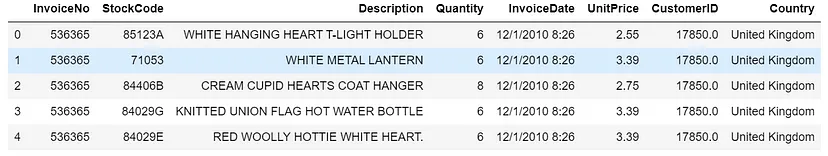

## 2. Time Pattern Analysis:¶
Perform exploratory data analysis (EDA) to visualize the temporal distribution of orders over time.

Utilize statistical techniques such as time series analysis or frequency analysis to identify patterns and trends in online shopping behavior.

Determine peak shopping periods and time windows when customers are most active.

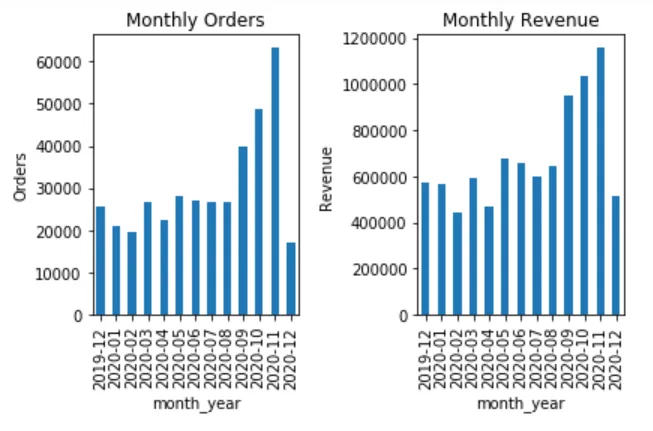

## 3. RFM Customer Segmentation with K-Means Clustering:¶
Calculate RFM metrics (Recency, Frequency, Monetary) for each customer based on their transaction history.

Segment customers into distinct groups using clustering algorithms such as KMeans or hierarchical clustering.

Analyze the characteristics and behaviors of each customer segment, including their purchasing frequency, recency of purchases, and monetary value.

## RFM segmentation

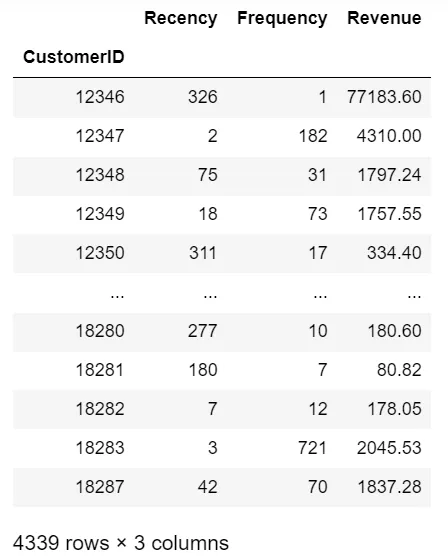

## RFM Segmentation using K-Means Clustering

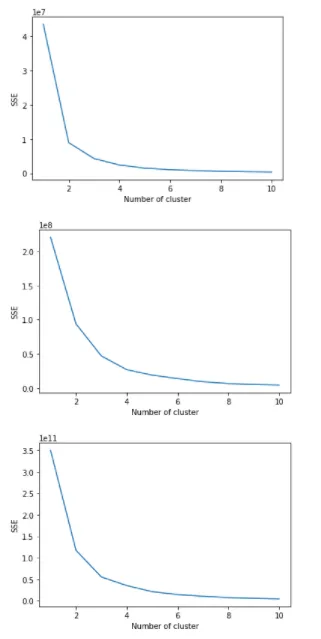

## Results 

Best Customers (RFMindex 112, 121, 122) : Loyal and high spender customers.

High-Spending New Customer (RFMindex 131, 132, 142): Recently active customers with low orders frequency (can be New Customers) but obtain big revenues.

Low-Spending Loyal Customer (RFMindex 113, 123, 124): Loyal customers who recently active but low-spenders.

Low Spending New Customer (RFMindex 133, 134, 143, 144): They’re recently active customers who hasn’t order much and obtain low revenue.

About to Sleep Customer (RFMindex: 234, 244): Low spenders and rarely placed orders, hasn’t been active recently.

Churned Customer (RFMindex 334, 343, 344, 434, 443, 444): Customers who hasn’t been active for a long time, low orders frequency, and low spenders.


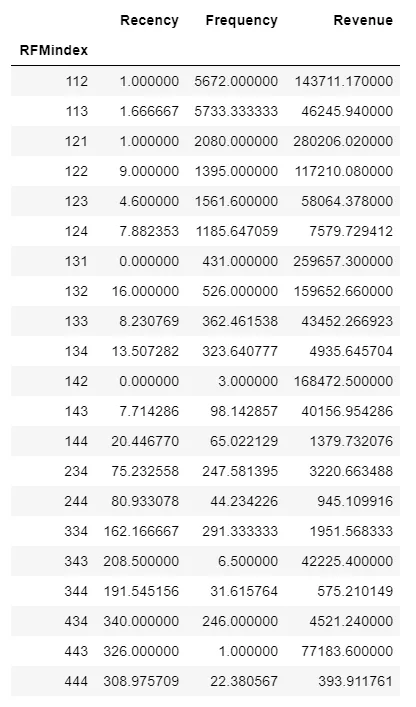

## Conclussions

1. Best Customers: Keep the customers happy and feeling valued with rewards such as personalized messages and preferences.

2. High-Spending New Customer: Because these customers spend a lot in their first encounters so it’s important to keep engage with them.

4. Low-Spending Loyal Customer: Give incentive to increase spending.

5. Low Spending New Customer: Keep them shopping, give discount or free shipping vouchers.

6. About to Sleep Customer: Send a personalized email to reconnect and remind their account.

7. Churned Customer: Communicate with their basis specific preferences.

## QUESTION 2

Identify any online database like Kaggle.com and download data that is similar to one of the reviewed publication. Apply python libraries on the same Jupyter Notebook to carry out cluster analysis using one of the clustering algorithms applied in the reviewed publication and write notes on the markdown cells to illustrate each step     

## DATA UNDERSTANDING

I sourced my data from https://www.kaggle.com/datasets/sonalisingh1411/mallcustomersdataset for this project

In [36]:
## importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
# Check the shape of the dataset
print('Shape of the dataset:', df.shape)

#Information on features 
df.info()

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

#finding statistical summary
df.describe()


Shape of the dataset: (200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB

Data types of the columns:
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Missing values in each column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


This dataset has 200 rows and 5 columns.

It has data types intergers and object.

There are no missing values in this dataset.

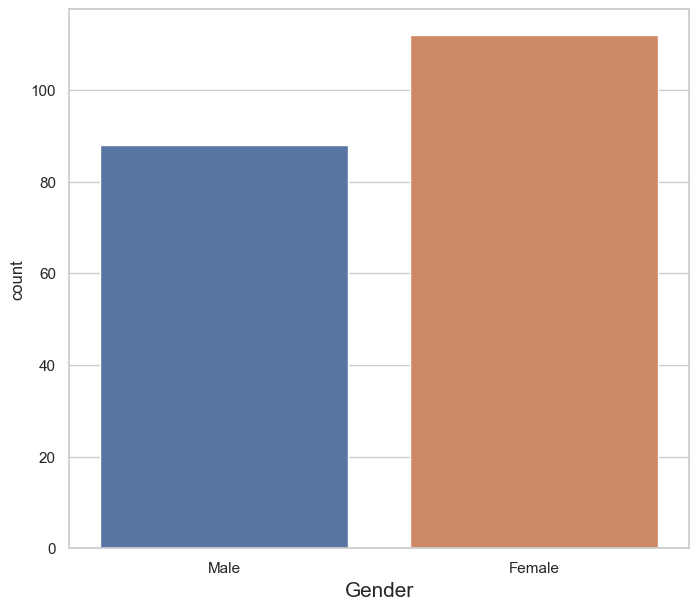

In [37]:
# checking for gender distribution
plt.figure(figsize=(8,7))
sns.countplot(df["Gender"])
plt.xlabel("Gender",fontsize = 15)
plt.show()

There are slightly more female than men in this data set.

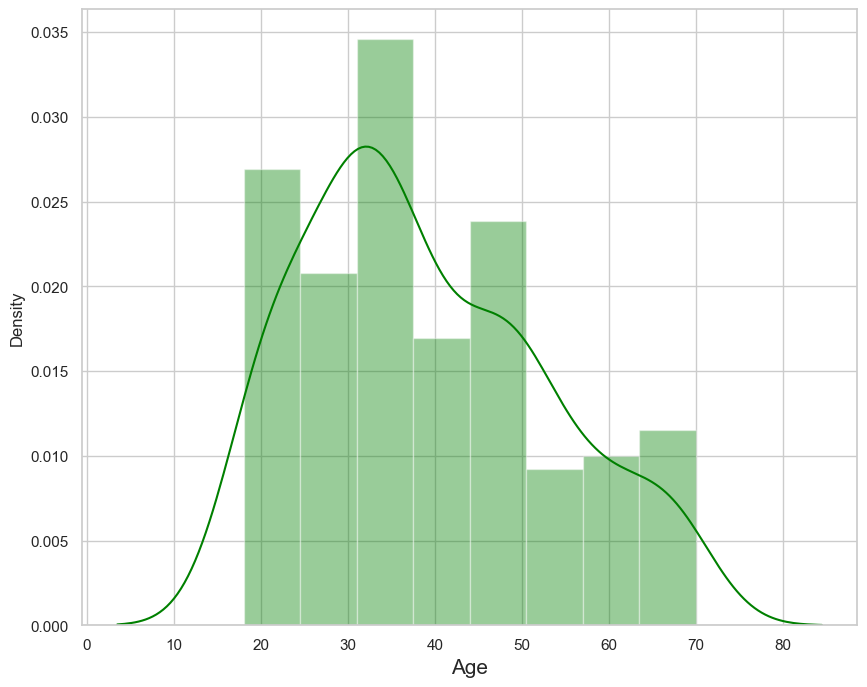

In [39]:
plt.figure(figsize=(10,8))
sns.distplot(df["Age"],color = "Green")
plt.xlabel("Age",fontsize = 15)
plt.show()

Age is postively skewed therefore the most appearing ages are between 30-40, while 50 is the median and the mean lies between 70 and 80.
most values are clustered around the left tail of the distribution while the right tail of the distribution is longer.

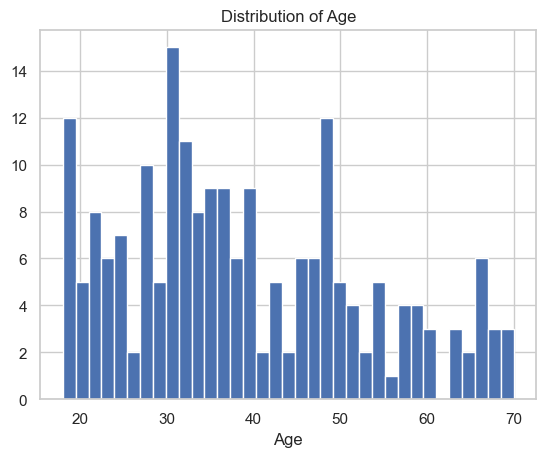

In [42]:
# Create a histogram of ages
df.hist('Age', bins=35);
plt.title('Distribution of Age');
plt.xlabel('Age');

The ages are mostly between 30 and 40

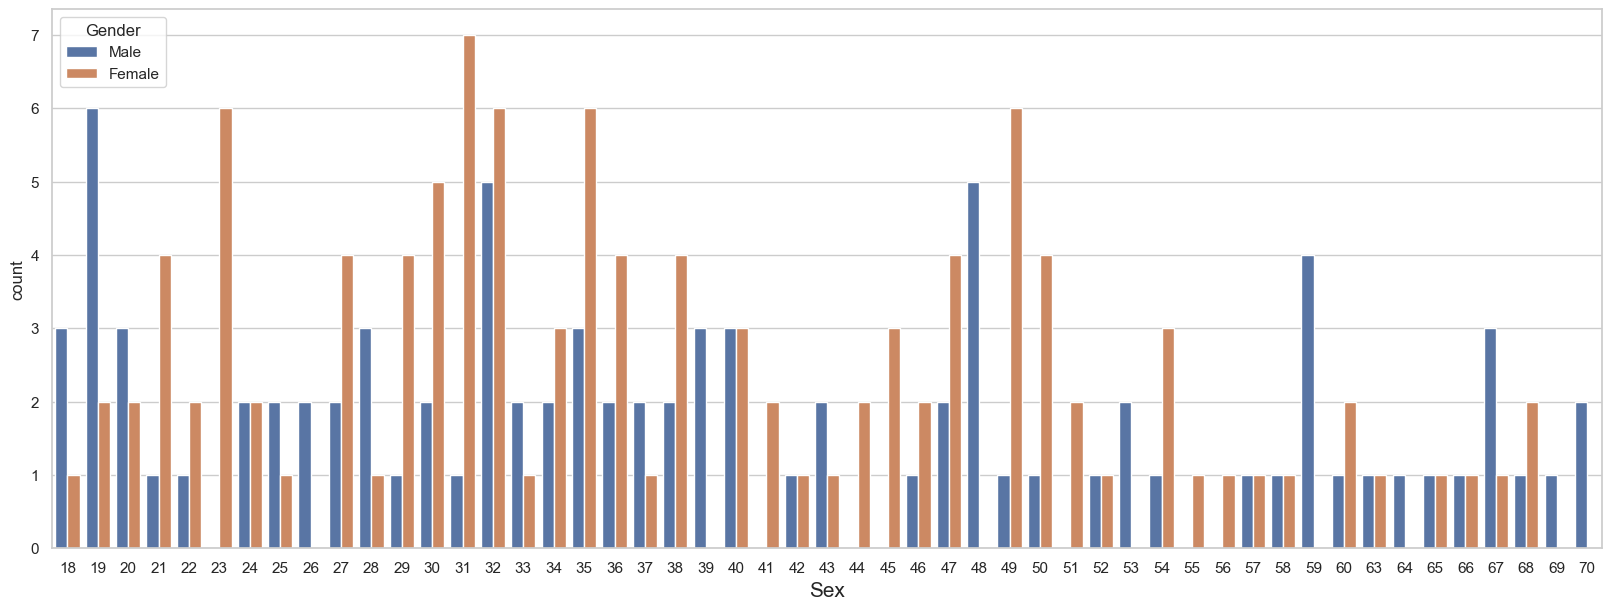

In [43]:
# distribution by gender
plt.figure(figsize=(20,7))
sns.countplot(data=df,
              x = "Age",
              hue = "Gender")
plt.xlabel("Sex",fontsize = 15)
plt.show()


The men in this data set tended to be younger than the women. You can see the spike around the age of 30–35 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is a significant amount of senior men in the 59–70 year old bucket.

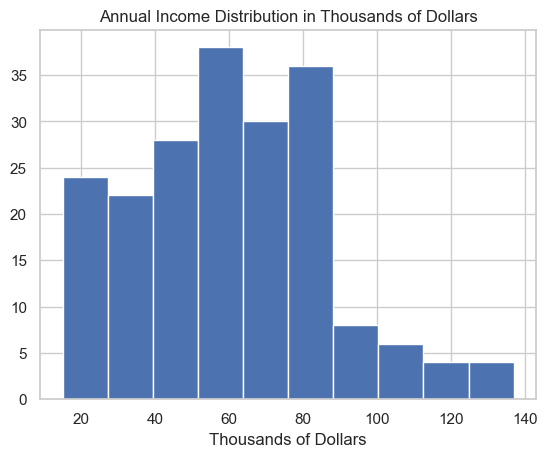

In [44]:
# income distribution
df.hist('Annual Income (k$)');
plt.title('Annual Income Distribution in Thousands of Dollars');
plt.xlabel('Thousands of Dollars');

Much of the incomes lie between the 60 and 85,000 dollar buckets

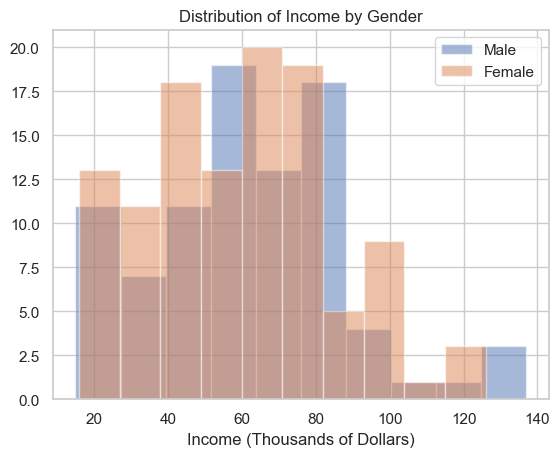

In [46]:
# Histogram of income by gender
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Annual Income (k$)', data=df[df['Gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Income by Gender');
plt.xlabel('Income (Thousands of Dollars)');
plt.legend();

The women in this data set make less money than the men.

In [48]:
# spending score
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# Print the average spending score for men and women
print(male_df['Spending Score (1-100)'].mean())
print(female_df['Spending Score (1-100)'].mean())

48.51136363636363
51.526785714285715


Men had an average spending score of 48.5 and women had an average score of 51.5. Women earned less but spent more at this mall and in this data set.

##  Statistical Summary of Numerical Features

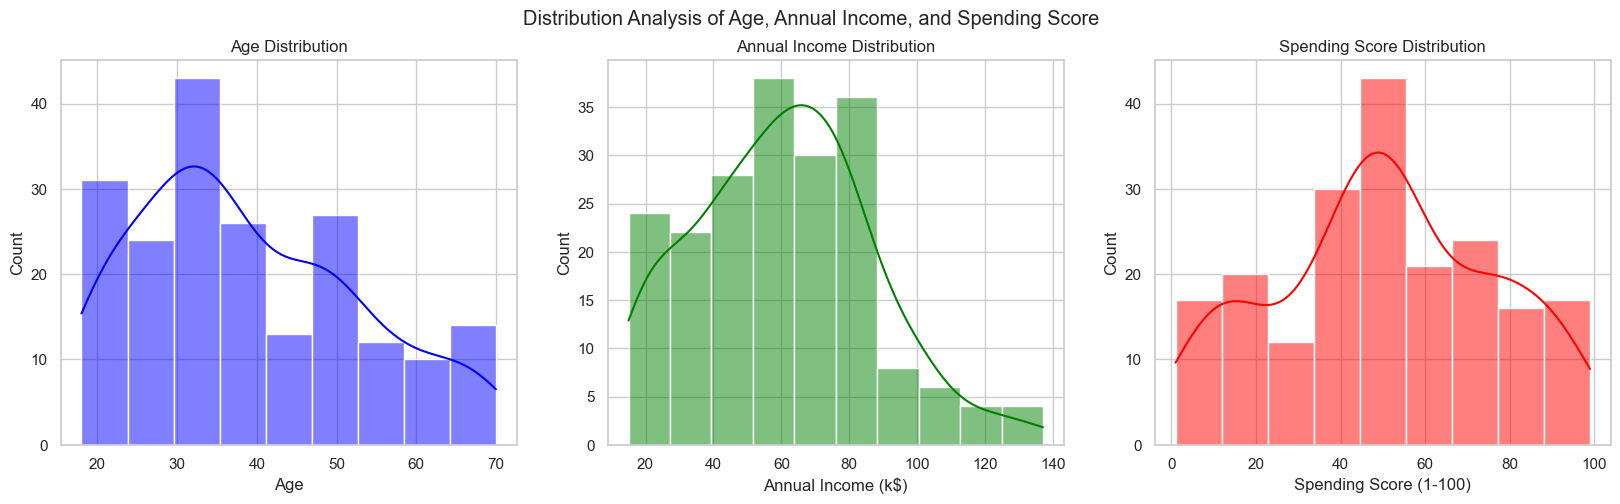

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the seaborn plot
sns.set(style='whitegrid')

# Create a figure and axis objects
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

# Plot the distribution of age, annual income, and spending score
sns.histplot(data=df, x='Age', kde=True, color='blue', ax=axs[0])
sns.histplot(data=df, x='Annual Income (k$)', kde=True, color='green', ax=axs[1])
sns.histplot(data=df, x='Spending Score (1-100)', kde=True, color='red', ax=axs[2])

# Set the titles of the plots
axs[0].set_title('Age Distribution')
axs[1].set_title('Annual Income Distribution')
axs[2].set_title('Spending Score Distribution')

# Set the title for the entire plot
fig.suptitle('Distribution Analysis of Age, Annual Income, and Spending Score')

# Display the plots
plt.show()

Age is postively distributed, annual income is also postively skewed and spending score is normally distributed.

## Elbow Method

The Elbow Method is a technique used to determine the optimal number of clusters for the K-means clustering algorithm. K-means requires us to specify the number of clusters beforehand, which can be challenging.

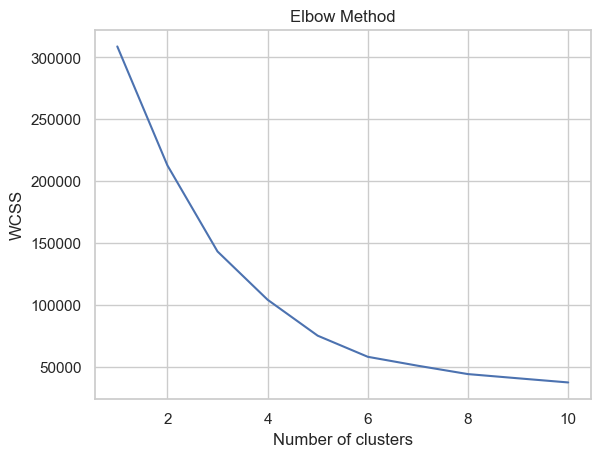

In [38]:
from sklearn.cluster import KMeans

# Select the features to use for clustering
features = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method helps by running K-means with different numbers of clusters and plotting the resulting scores. In this case, we have 5 clusters.

## K MEANS

The utilization of the KMeans model with 5 clusters facilitates the segmentation of our data into 5 discernible categories or "clusters". This selection of 5 clusters is informed by the previously conducted Elbow Method analysis.

In [50]:
# Create the KMeans model with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the model to the data and predict the cluster labels
labels = kmeans.fit_predict(features)

# Add the cluster labels to the dataframe
df['Cluster'] = labels

# Display the first few rows of the dataframe with the cluster labels
df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
95,96,Male,24,60,52,2
96,97,Female,47,60,47,2
97,98,Female,27,60,50,2
98,99,Male,48,61,42,2


After the model is fitted, it can predict which cluster any data point belongs to. These predictions, known as “cluster labels”, are then added to our original data for easy reference.



## Understanding clusters

In [51]:
# Calculate the mean values of Age, Annual Income, and Score for each cluster
cluster_means = df.groupby('Cluster')[
['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().astype(int)

# Display the cluster means
cluster_means

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,45,26,20
1,32,86,82
2,43,55,49
3,40,87,17
4,25,26,78


Cluster 0: This cluster comprises individuals with an average age of 45, relatively lower annual income ($26,000), and a low spending score (20).

Cluster 1: Individuals in this cluster have an average age of 32, a higher annual income ($86,000), and a high spending score (82).

Cluster 2: This cluster consists of individuals with an average age of 43, moderate annual income ($55,000), and a moderate spending score (49).

Cluster 3: Individuals in this cluster have an average age of 40, higher annual income ($87,000), and a low spending score (17).

Cluster 4: This cluster comprises individuals with a younger average age of 25, relatively lower annual income ($26,000), and a high spending score (78).

## Relationship between Annual income and spending income.

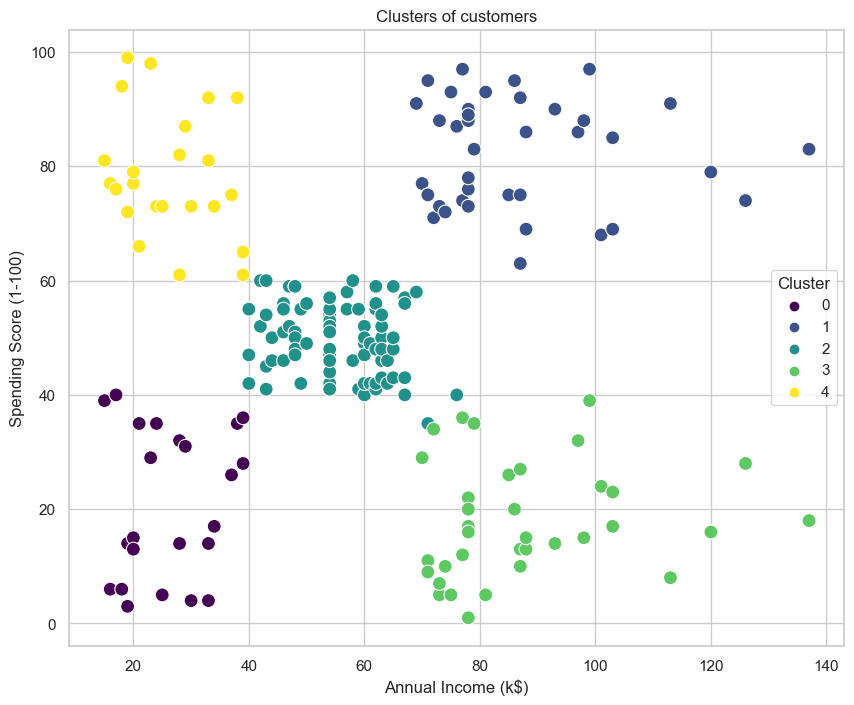

In [52]:
# Create a scatter plot of 'Annual Income (k$)' vs 'Spending Score (1-100)' colored by 'Cluster'
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers')

# Display the plot
plt.show()


The scatter plot visually illustrates how the KMeans algorithm has clustered customers according to their annual income and spending score. Each data point on the plot corresponds to a customer, with the color of the point indicating the cluster membership of that customer.
## Illustrations

Low income, low spending: Customers with an annual income between 20 and 40k and a spending score between 0 and 40. They have lower incomes and tend to spend less.

High income, low spending: Customers with an annual income between 55 and 140k and a spending score between 0 and 40. Despite their higher incomes, they tend to spend less.

Medium income, medium spending: Customers with an annual income between 40 and 80k and a spending score between 40 and 60. These customers have moderate incomes and spending habits. This is the most concentrated cluster, indicating a large number of customers fall into this category.

Low income, high spending: Customers with an annual income between 20 and 40k and a spending score between 60 and 100. Interestingly, these customers have lower incomes but tend to spend more.

High income, high spending: Customers with an annual income between 70 and 140k and a spending score between 60 and 100. These customers have higher incomes and also tend to spend more.

## Relationship between Age and Spending Score

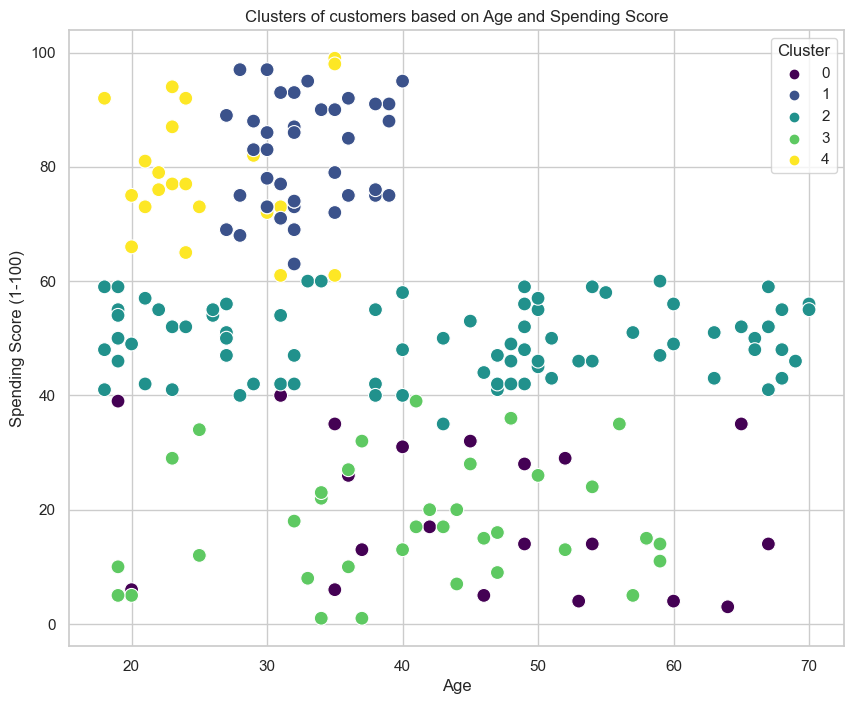

In [54]:
# Create a scatter plot of Age vs Spending Score 
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Cluster', 
palette='viridis', s=100)

# Add a title to the plot
plt.title('Clusters of customers based on Age and Spending Score')

# Display the plot
plt.show()

This scatter plot provides a visual representation of customer segments based on age and spending score. Each color represents a different cluster, or customer segment.

## Illustrations
Young, high spenders: This cluster represents younger customers who have high spending scores. They might be attracted to trendy items and are willing to spend more. These two clusters include customers in their 20s and 30s with a spending score between 60 and 100. The fact that these clusters are almost overlapping could suggest that age is less of a distinguishing factor among these high-spending customers. These customers are likely to be the mall’s high-value customers due to their high spending scores.

Middle-aged, moderate spenders: This cluster represents customers in their middle age with moderate spending scores. They might be more conservative in their spending habits. This cluster includes ages ranging from 20 to 70 and a spending score between 40 and 60. This is a broad age range, suggesting that the mall attracts customers of various ages who have a moderate spending score. This could be the mall’s primary customer base.

Older, low spenders: This cluster represents older customers who have low spending scores. They might be more frugal or less attracted to the products offered.

The scatter plot allows us to visualize these segments, providing valuable insights into the different types of customers that visit the mall. This information can be used to tailor marketing strategies and product offerings to each specific group.

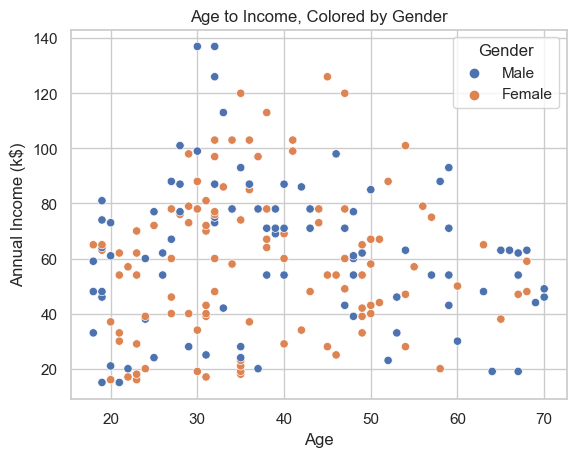

In [56]:
sns.scatterplot('Age', 'Annual Income (k$)', hue='Gender', data=df);
plt.title('Age to Income, Colored by Gender');

## QUESTION 3

Explain the results on the markdown cells of the same Jupyter Notebook and Compare the results with those from the reviewed publication on the markdown cells of the Jupyter notebook


# Results Analysis

## Customer Segmentation Analysis:

### Identified Segments:
- **Young, High Spenders**: This segment comprises younger customers with high spending scores, suggesting a preference for trendy items and a willingness to spend more.
- **Middle-aged, Moderate Spenders**: Customers in their middle age with moderate spending scores, indicating more conservative spending habits.
- **Older, Low Spenders**: Represents older customers with low spending scores, possibly indicating frugality or less interest in the mall's products.
- **Income-based Segments**: Segments based on income and spending behavior, including low income, low spending; high income, low spending; medium income, medium spending; low income, high spending; and high income, high spending groups.

### Marketing Implications:
- **Tailored Strategies**: The analysis suggests the need for tailored marketing strategies to engage each segment effectively.
- **Targeted Promotions**: Specific recommendations are provided for targeting each segment with personalized offers and promotions.
- **Retention and Acquisition**: By understanding the characteristics and preferences of each segment, the mall can optimize customer retention and acquisition efforts.

## Comparison with Reviewed Publication:

### Similarities:
- **Segmentation Patterns**: Both the project and the reviewed publication identify similar customer segmentation patterns, including segments based on age, income, and spending behavior.
- **Marketing Recommendations**: Common recommendations are provided for tailoring marketing strategies and promotions to each segment's preferences.

### Differences:
- **Depth of Analysis**: The project provides a more detailed analysis of customer segments, including specific age ranges and income brackets, compared to the reviewed publication.
- **Focus Areas**: While both sources discuss the importance of tailored marketing strategies, the project places more emphasis on income-based segments and their implications for marketing tactics.

### Implications:
- **Enhanced Insights**: By comparing the results with those from the reviewed publication, the project gains enhanced insights into customer segmentation and marketing strategy optimization.
- **Actionable Recommendations**: The project findings offer actionable recommendations for the mall to implement targeted marketing campaigns and improve customer engagement and retention.

